##### Importing required libraries

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from datetime import datetime
import seaborn as sns

##### extracting the rar file

In [ ]:
!pip install rarfile -q

In [ ]:
import rarfile
rar_file='/content/Meiro Mobility_ML Assignment Dataset_Jan2022Jul2023.rar'
extract_path='/content/'

def extract_rar(rar_file, extract_path):
    with rarfile.RarFile(rar_file, 'r') as rf:
        rf.extractall(extract_path)

extract_rar(rar_file, extract_path)


##### creating the test and training dataset for each months and combining respective data

In [ ]:
import glob
import pandas as pd
from sklearn.model_selection import train_test_split

#JSON files
json_files = glob.glob('/content/Jan2022Jul2023/*.json')

dfs = []

#Loop through each JSON file
for file in json_files:
    df = pd.read_json(file)
    df['startTime'] = pd.to_datetime(df['startTime'])
    df['endTime'] = pd.to_datetime(df['endTime'])
    dfs.append(df)


# Concatenate all DataFrames into a single DataFrame
merged_dfs = pd.concat(dfs, ignore_index=True)

### EDA

In [ ]:
merged_dfs.describe()

,driverId,tripId,tripDistance,tripSpeed,tripDuration,tripFare
count,99017.000000,99017.000000,99017.000000,99017.000000,99017.000000,99017.000000
mean,27.904107,3419.480241,6.895905,21.273488,20.335781,74.959047
std,22.513302,2938.828448,3.317498,4.317363,10.984488,33.174982
min,1.000000,0.000000,1.200000,13.000000,3.000000,18.000000
25%,11.000000,1318.000000,4.300000,17.790000,12.000000,49.000000
50%,23.000000,2708.000000,6.600000,21.360000,19.000000,72.000000
75%,36.000000,4292.000000,9.100000,24.840000,27.000000,97.000000
max,99.000000,13162.000000,19.800000,29.000000,88.000000,204.000000


In [ ]:
merged_dfs.isnull().sum()

driverId         0
tripId           0
startLocation    0
tripDistance     0
tripSpeed        0
tripDuration     0
endLocation      0
startTime        0
tripFare         0
paymentType      0
endTime          0
dtype: int64

#### Visualizations

In [ ]:
def seperate_f(data):
    # Extract month, day, hour, and weekday, 15min_per_hour from startTime
    data['year'] = data['startTime'].dt.year
    data['month'] = data['startTime'].dt.month
    data['day'] = data['startTime'].dt.day
    data['hour'] = data['startTime'].dt.hour
    data['weekday'] = data['startTime'].dt.weekday
    data['15min_per_hour'] = pd.cut(data['startTime'].dt.minute, bins=[0, 15, 30, 45, 60], labels=False, right=False)



seperate_f(merged_dfs)

In [ ]:
merged_dfs.head()

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,paymentType,endTime,year,month,day,hour,weekday,15min_per_hour
0,1,0,"[22.921315, 72.575097]",5.4,20.59,16,"[22.970205, 72.575097]",2022-03-01 15:11:00,60,cash,2022-03-01 15:26:00,2022,3,1,15,1,0
1,1,1,"[23.048445, 72.554497]",9.1,24.75,22,"[23.089313, 72.631482]",2022-03-01 22:19:00,97,cash,2022-03-01 22:41:00,2022,3,1,22,1,1
2,1,2,"[22.960544, 72.554497]",14.3,23.09,37,"[23.089431, 72.554497]",2022-03-01 22:41:00,149,cash,2022-03-01 23:18:00,2022,3,1,22,1,2
3,1,3,"[23.081354, 72.494637]",3.1,18.62,10,"[23.101339, 72.516366]",2022-03-02 12:23:00,37,upi,2022-03-02 12:33:00,2022,3,2,12,2,1
4,1,4,"[23.081485, 72.528694]",3.5,16.02,13,"[23.10696, 72.548089]",2022-03-02 19:14:00,41,cash,2022-03-02 19:26:00,2022,3,2,19,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99012,34,4321,"[22.98367, 72.496572]",7.8,25.39,18,"[23.041207, 72.540357]",2022-08-30 22:55:00,84,cash,2022-08-30 23:13:00,2022,8,30,22,1,3
99013,34,4322,"[23.010615, 72.485915]",10.2,19.32,32,"[23.056567, 72.572461]",2022-08-31 10:05:00,108,cash,2022-08-31 10:36:00,2022,8,31,10,2,0
99014,34,4323,"[22.950793, 72.597112]",5.9,13.94,25,"[22.999194, 72.620523]",2022-08-31 19:53:00,65,cash,2022-08-31 20:18:00,2022,8,31,19,2,3
99015,34,4324,"[22.996678, 72.574682]",7.0,22.14,19,"[23.032769, 72.630706]",2022-08-31 22:36:00,76,cash,2022-08-31 22:54:00,2022,8,31,22,2,2


##### adding some features

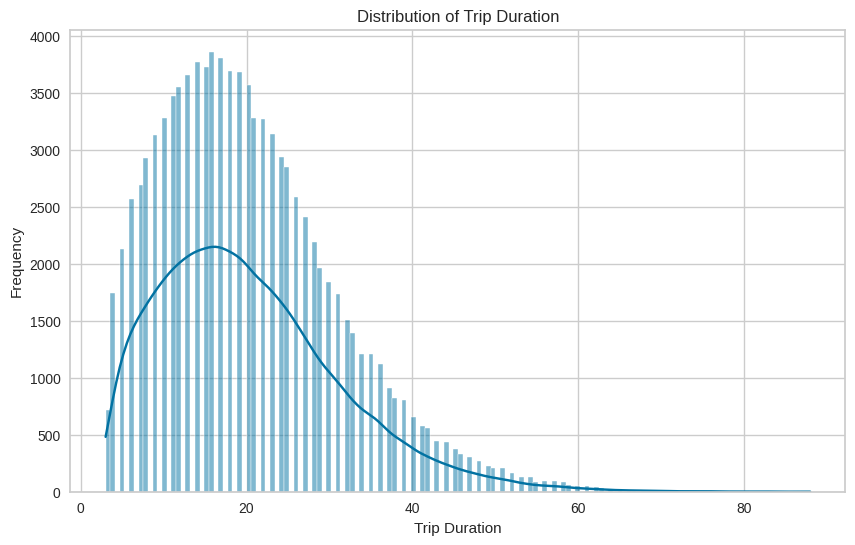

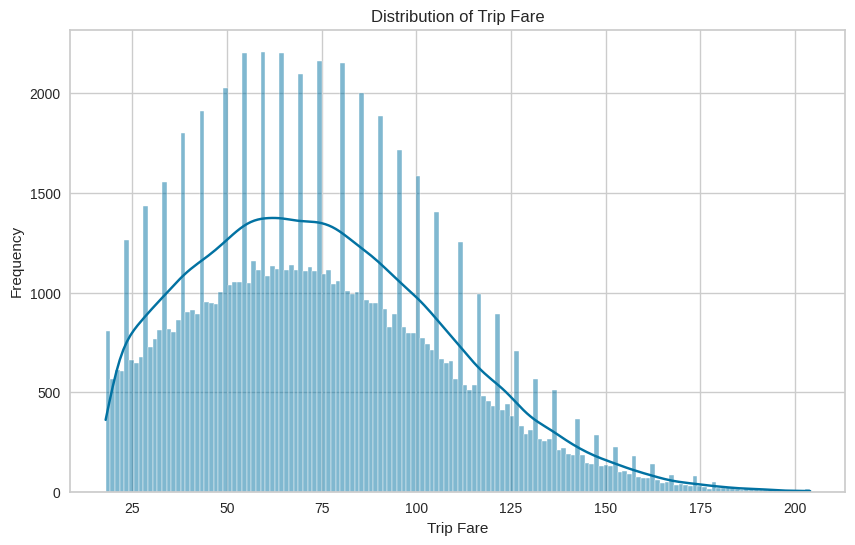

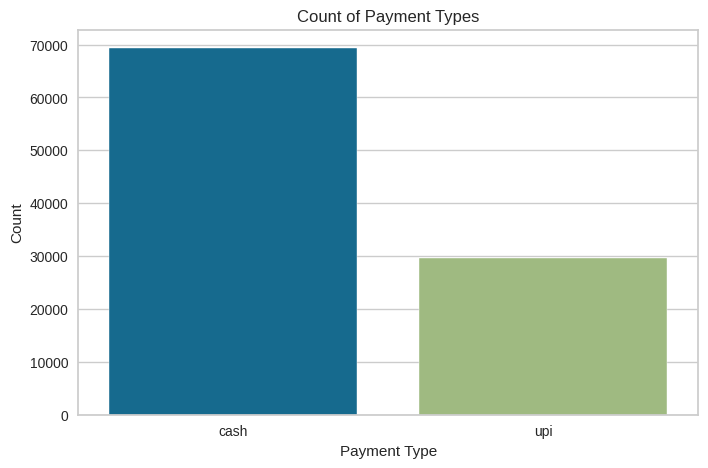

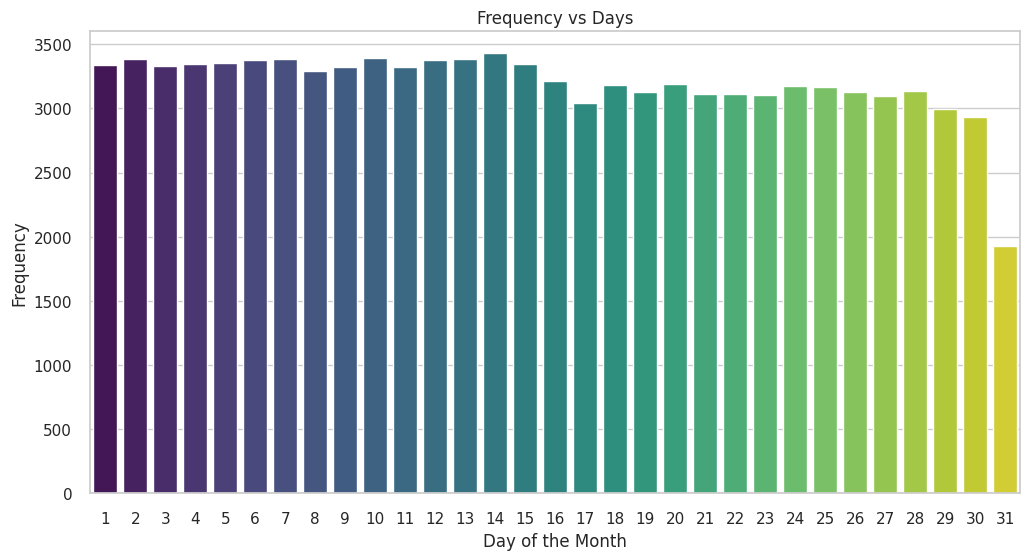

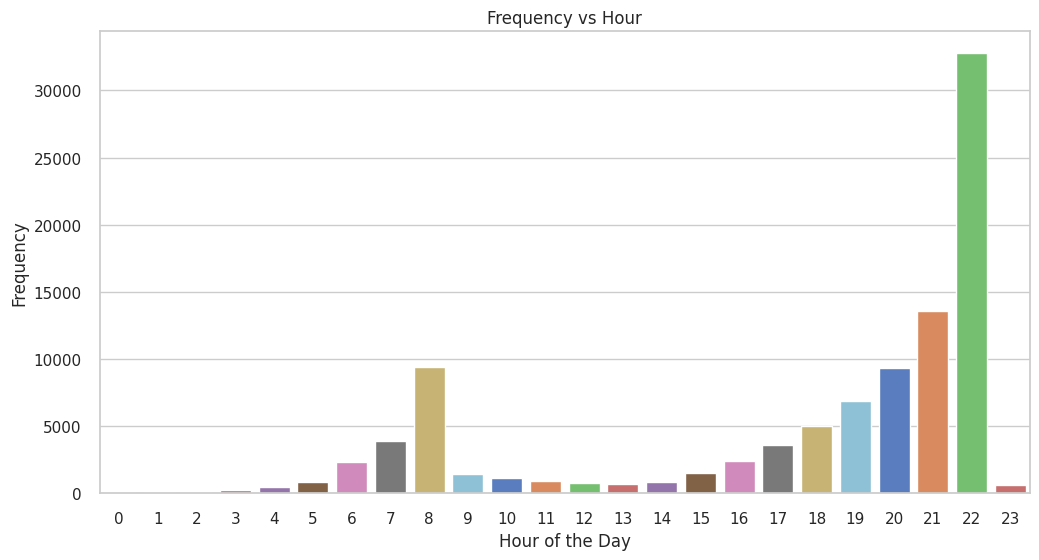

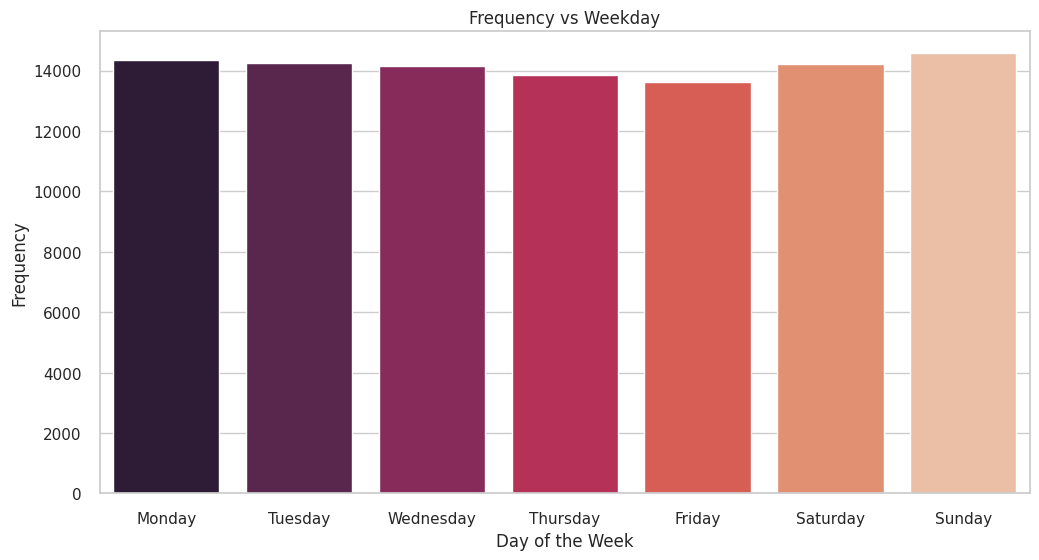

In [ ]:
def visualize_data(df):
    # Visualize the distribution of 'tripDuration'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['tripDuration'], bins=150, kde=True)
    plt.title('Distribution of Trip Duration')
    plt.xlabel('Trip Duration')
    plt.ylabel('Frequency')
    plt.show()

    # Visualize the distribution of 'tripFare'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['tripFare'], bins=150, kde=True)
    plt.title('Distribution of Trip Fare')
    plt.xlabel('Trip Fare')
    plt.ylabel('Frequency')
    plt.show()

    # Countplot for 'paymentType'
    plt.figure(figsize=(8, 5))
    sns.countplot(x='paymentType', data=df)
    plt.title('Count of Payment Types')
    plt.xlabel('Payment Type')
    plt.ylabel('Count')
    plt.show()

    # Set the style for the plots (optional)
    sns.set(style="whitegrid")

    # Plot 1: Frequency vs Days
    plt.figure(figsize=(12, 6))
    sns.countplot(x='day', data=df, palette='viridis')
    plt.title('Frequency vs Days')
    plt.xlabel('Day of the Month')
    plt.ylabel('Frequency')
    plt.show()

    # Plot 2: Frequency vs Hour
    plt.figure(figsize=(12, 6))
    sns.countplot(x='hour', data=df, palette='muted')
    plt.title('Frequency vs Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency')
    plt.show()

    # Plot 3: Frequency vs Weekday
    plt.figure(figsize=(12, 6))
    sns.countplot(x='weekday', data=df, palette='rocket')
    plt.title('Frequency vs Weekday')
    plt.xlabel('Day of the Week')
    plt.ylabel('Frequency')
    plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.show()

# Assuming df_eda is your DataFrame
visualize_data(merged_dfs)


##### heat map of the start loc

In [ ]:
!pip install folium seaborn -q

In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

def create_and_display_heatmap(df):
    # Extract latitude and longitude from startLocation
    start_locations = pd.DataFrame(df['startLocation'].tolist(), columns=['latitude', 'longitude'])

    # Create a folium map centered around the mean of the start locations
    m = folium.Map(location=[start_locations['latitude'].mean(), start_locations['longitude'].mean()], zoom_start=12)

    # Create a HeatMap layer
    heat_data = [[point['latitude'], point['longitude']] for index, point in start_locations.iterrows()]
    HeatMap(heat_data).add_to(m)

    # Save the map as an HTML file or display it
    m.save('heatmap.html')

    # Display the map
    return m

# Assuming df_eda is your DataFrame
create_and_display_heatmap(merged_dfs)


Here

we are find the demand based on the 15 mins interval and also based on the cluster/group

first lets divide the demand into the cluster/group and find the feature

In [ ]:
!pip install yellowbrick -q

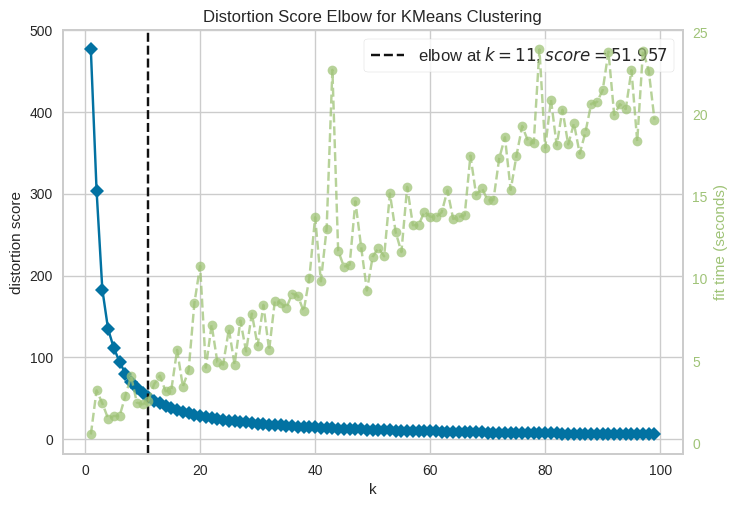

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings

def visualize_kmeans_elbow(df):
    # Suppress FutureWarning in sklearn.cluster._kmeans
    warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

    # Extract latitude and longitude from startLocation
    start_locations = pd.DataFrame(df['startLocation'].tolist(), columns=['latitude', 'longitude'])

    # Use the KElbowVisualizer from yellowbrick
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1, 100))  # Try different values of k
    visualizer.fit(start_locations)
    visualizer.show()

# Assuming df_eda is your DataFrame
visualize_kmeans_elbow(merged_dfs)

In [ ]:
from sklearn.cluster import KMeans

def assign_clusters(data, num_clusters):
    # Extract latitude and longitude from startLocation
    start_locations = pd.DataFrame(data['startLocation'].tolist(), columns=['latitude', 'longitude'])


    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    start_locations['cluster'] = kmeans.fit_predict(start_locations)

    # Merge cluster information back to the original DataFrame
    data_with_clusters = pd.concat([data, start_locations['cluster']], axis=1)

    return data_with_clusters

# Set the number of clusters based on your analysis or experimentation
num_clusters = 35  # Adjust this based on your dataset and requirements

# Add the 'cluster' column to your DataFrame
merged_dfs = assign_clusters(merged_dfs, num_clusters)


Here i took 35 cluster because the average area of ahmedabad 20+ km * 20+ km

so i have divided it into 3+ km * 3+km each (as optimum when compared to kms) making it 35

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


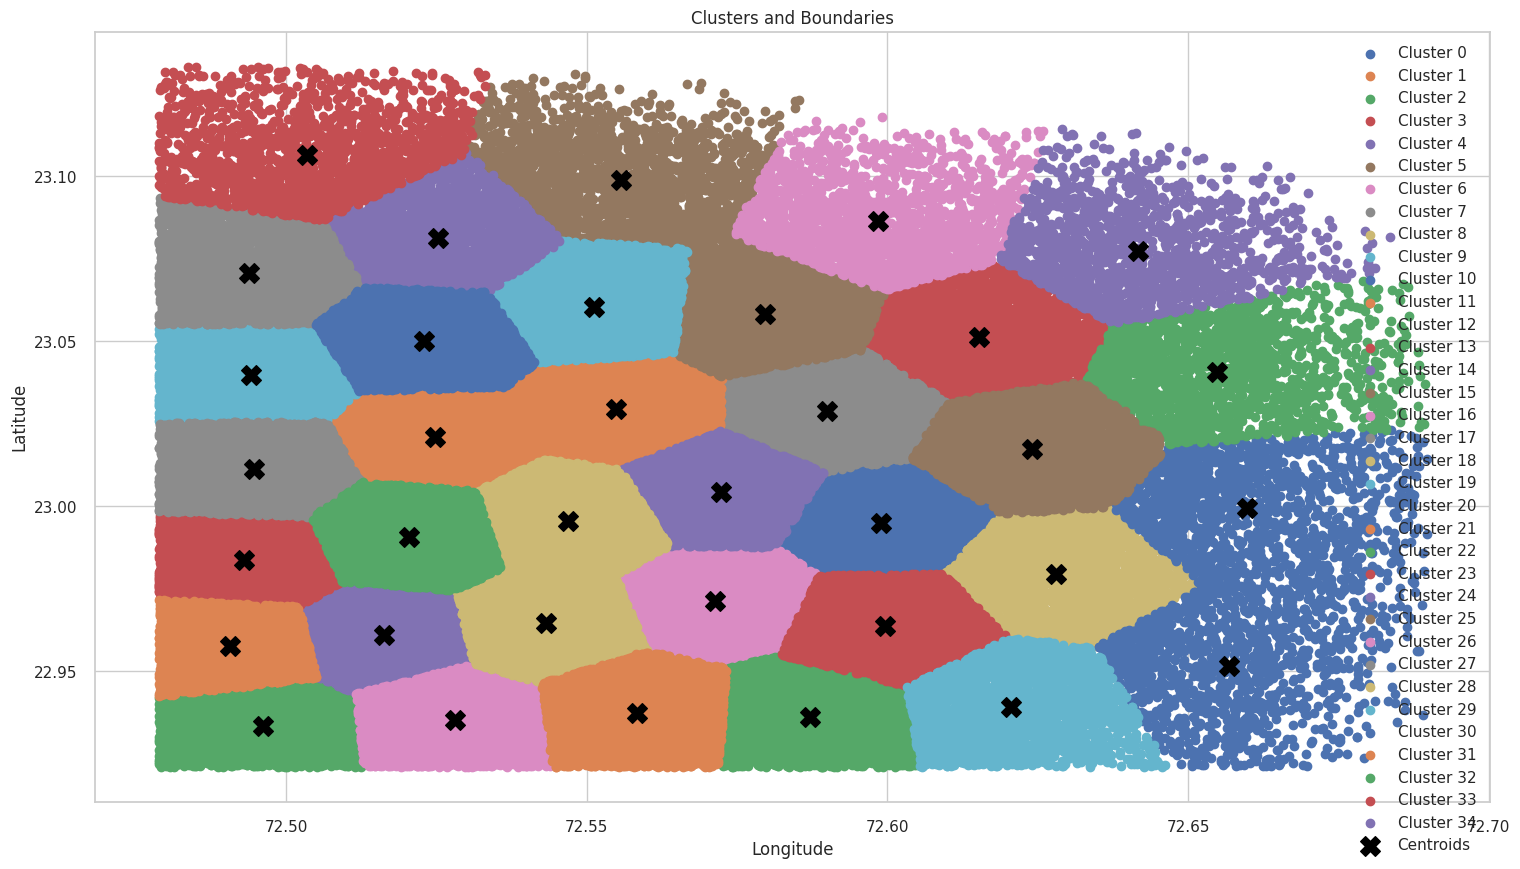

In [ ]:
def visualize_clusters(data, num_clusters):
    # Extract latitude and longitude from startLocation
    start_locations = pd.DataFrame(data['startLocation'].tolist(), columns=['latitude', 'longitude'])

    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    start_locations['cluster'] = kmeans.fit_predict(start_locations)

    # Plot clusters and boundaries
    plt.figure(figsize=(18, 10))

    # Plot scatter plot with different colors for each cluster
    for cluster in range(num_clusters):
        cluster_data = start_locations[start_locations['cluster'] == cluster]
        plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}')

    # Plot cluster centroids
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], marker='X', s=200, color='black', label='Centroids')

    plt.title('Clusters and Boundaries')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.show()

# Visualize clusters and boundaries
visualize_clusters(merged_dfs, num_clusters)


In [ ]:
merged_dfsss= merged_dfs.copy() #coping for future

In [ ]:
merged_dfs= merged_dfs.sort_values(by='startTime').reset_index(drop=True)
merged_dfs

,driverId,tripId,startLocation,tripDistance,tripSpeed,tripDuration,endLocation,startTime,tripFare,paymentType,endTime,year,month,day,hour,weekday,15min_per_hour,cluster
0,32,3915,"[23.026471, 72.559203]",4.6,21.84,13,"[23.050286, 72.596172]",2022-01-01 06:35:00,52,upi,2022-01-01 06:47:00,2022,1,1,6,5,2,11
1,4,372,"[22.967401, 72.539526]",12.1,20.41,36,"[23.076577, 72.539526]",2022-01-01 06:59:00,127,cash,2022-01-01 07:34:00,2022,1,1,6,5,3,28
2,36,4388,"[22.952247, 72.503346]",4.4,25.38,10,"[22.974687, 72.53816]",2022-01-01 07:41:00,50,cash,2022-01-01 07:51:00,2022,1,1,7,5,2,21
3,2,132,"[23.050909, 72.590623]",7.9,23.15,20,"[23.115559, 72.621921]",2022-01-01 07:47:00,85,upi,2022-01-01 08:07:00,2022,1,1,7,5,3,15
4,6,633,"[23.087811, 72.48291]",2.1,16.50,8,"[23.097227, 72.500642]",2022-01-01 08:47:00,27,cash,2022-01-01 08:54:00,2022,1,1,8,5,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99012,10,1271,"[22.994547, 72.60009]",7.6,13.61,34,"[23.063192, 72.60009]",2023-08-01 08:57:00,82,cash,2023-08-01 09:30:00,2023,8,1,8,1,3,0
99013,16,1975,"[23.043457, 72.622388]",8.4,16.62,30,"[23.112089, 72.655613]",2023-08-01 08:57:00,90,upi,2023-08-01 09:27:00,2023,8,1,8,1,3,3
99014,47,5759,"[23.065803, 72.495884]",9.4,24.74,23,"[23.065777, 72.587438]",2023-08-01 08:57:00,100,cash,2023-08-01 09:19:00,2023,8,1,8,1,3,27
99015,18,2213,"[22.996694, 72.61565]",9.2,22.25,25,"[23.06472, 72.667427]",2023-08-01 08:58:00,98,cash,2023-08-01 09:22:00,2023,8,1,8,1,3,0


##### creating the weather data (tried but didnt feched, it takes time)

In [ ]:
!pip install meteostat -q

In [ ]:
from datetime import datetime
from meteostat import Point
from meteostat import Hourly
from meteostat import Daily
from meteostat import Monthly
import pandas as pd

In [ ]:
# Set time period
start = datetime(2021, 1, 1)
end = datetime(2022, 9, 30)

# Create Point for Bangalore, KARNATAKA
place = Point(12.971599, 77.594566)
data = Daily(place, start, end)
data = data.fetch()

In [ ]:
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-01,20.6,16.6,25.3,0.5,NaN,93.0,10.4,NaN,1015.7,NaN
2021-01-02,20.9,16.6,26.0,0.4,NaN,74.0,11.3,NaN,1014.5,NaN
2021-01-03,21.9,18.8,26.0,0.0,NaN,86.0,12.0,NaN,1013.0,NaN
2021-01-04,20.8,18.6,27.6,0.0,NaN,84.0,10.8,NaN,1013.1,NaN
2021-01-05,21.9,18.7,26.2,0.0,NaN,83.0,10.9,NaN,1013.9,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-09-26,22.6,21.0,29.4,0.0,NaN,322.0,8.1,NaN,1010.9,NaN
2022-09-27,24.1,20.6,27.1,13.0,NaN,299.0,8.2,NaN,1009.8,NaN
2022-09-28,23.7,21.1,27.7,0.0,NaN,292.0,8.5,NaN,1008.5,NaN


In [ ]:
"""
from datetime import datetime
from meteostat import Hourly

# Assuming your DataFrame is named 'df'

# Function to fetch weather data for a given timestamp
def fetch_weather_data(timestamp):
    # Get the latitude and longitude from your startLocation column
    latitude, longitude = df['startLocation'].iloc[0]

    place = Point(latitude, longitude)

    # Fetch hourly data for the timestamp
    hourly_data = Hourly(place, timestamp, timestamp)

    print(hourly_data)

# Add temperature and precipitation columns to the DataFrame
print(fetch_weather_data(df['startTime'][5]))

"""


None


##### trips by zones

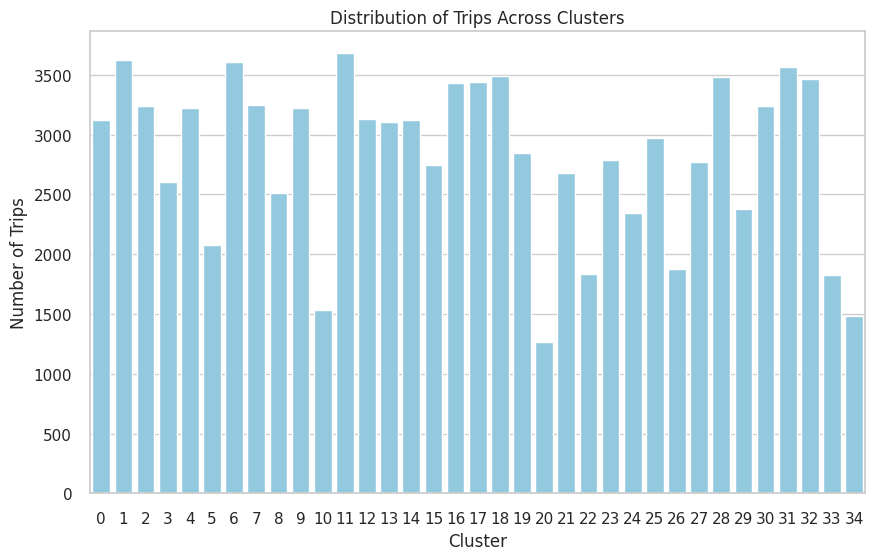

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of trips in each cluster
cluster_counts = merged_dfs['cluster'].value_counts().sort_index()


# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, color='skyblue')
plt.title('Distribution of Trips Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Trips')
plt.show()


In [ ]:
demand_by_time_zone = merged_dfs.groupby(['cluster','year', 'month', 'day', 'hour', 'weekday','15min_per_hour']).size().reset_index(name='demand_15min_zone')


In [ ]:
demand_by_time_zone

,cluster,year,month,day,hour,weekday,15min_per_hour,demand_15min_zone
0,0,2022,1,1,13,5,0,1
1,0,2022,1,1,16,5,2,1
2,0,2022,1,1,18,5,2,1
3,0,2022,1,1,21,5,1,1
4,0,2022,1,1,22,5,1,1
...,...,...,...,...,...,...,...,...
87136,34,2023,7,31,8,0,2,2
87137,34,2023,7,31,16,0,1,1
87138,34,2023,7,31,17,0,2,1
87139,34,2023,7,31,22,0,3,1


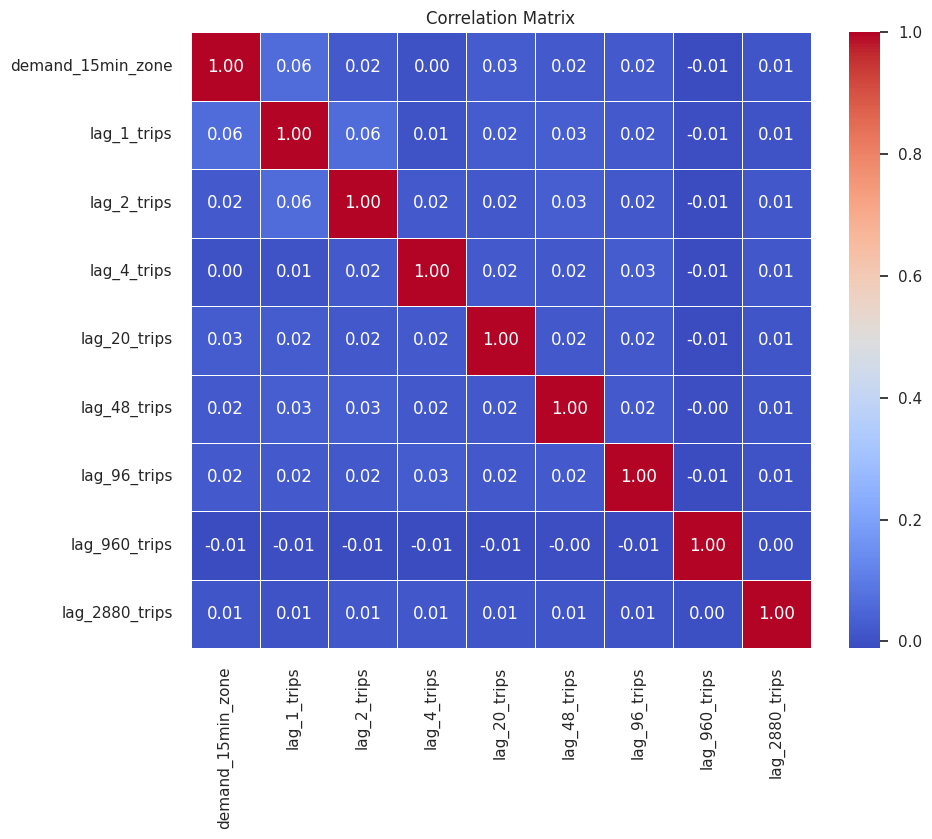

In [ ]:
# Assuming df is your sorted DataFrame
dff=demand_by_time_zone

# Calculate lag features for previous hours
lag_ = [1, 2, 4, 20, 48, 96, 960, 2880]  # Adjust as needed
for lag in lag_:
    dff[f'lag_{lag}_trips'] = dff['demand_15min_zone'].shift(lag)

# Drop rows with NaN values introduced by lagging
dff.dropna(inplace=True)

# Calculate correlation matrix
correlation_matrix = dff[['demand_15min_zone','lag_1_trips', 'lag_2_trips', 'lag_4_trips',
                          'lag_20_trips', 'lag_48_trips', 'lag_96_trips', 'lag_960_trips', 'lag_2880_trips' ]].corr()


# Plot heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Demand patterns/ feature scalling

lets add
- peek traffic hours
  - 5:59 am to 9:01 am
  - 3:59 pm to 11:01

- High traffic zones
    - above 2000 trips in cluster are high zones

- No effect on weekdays/weekends (as per previous graphs)

- previous demand (no correlation in trend)
    - previous 24 hrs
    - previous 30 days


In [ ]:
import pandas as pd

df= demand_by_time_zone

def is_peek_traffic_hours(hour):
    return (6 <= hour <= 8) or (16 <= hour <= 22)


def add_columns(df):

    # 1. Peek Traffic Hours
    df['peek_traffic_hours'] = df['hour'].apply(is_peek_traffic_hours).astype(int)

    # 2. High Traffic Zone
    high_traffic_zones = df.groupby('demand_15min_zone')['cluster'].sum() >= 3000
    df['high_traffic_zone'] = df['demand_15min_zone'].map(high_traffic_zones).astype(int)

    '''
    # 3. Previous Demand
    # Previous 24 hours
    df['previous_demand_24hrs'] = df['demand_15min_zone'].shift(4*24).fillna(0).astype(int)
    # Previous 30 days
    df['previous_demand_30days'] = df['demand_15min_zone'].shift(4*24*30).fillna(0).astype(int)  # Assuming 288 (24*4*30) 15-minute intervals per day
    '''

    # Fill NaN values with 0
    df.fillna(0)

add_columns(df)



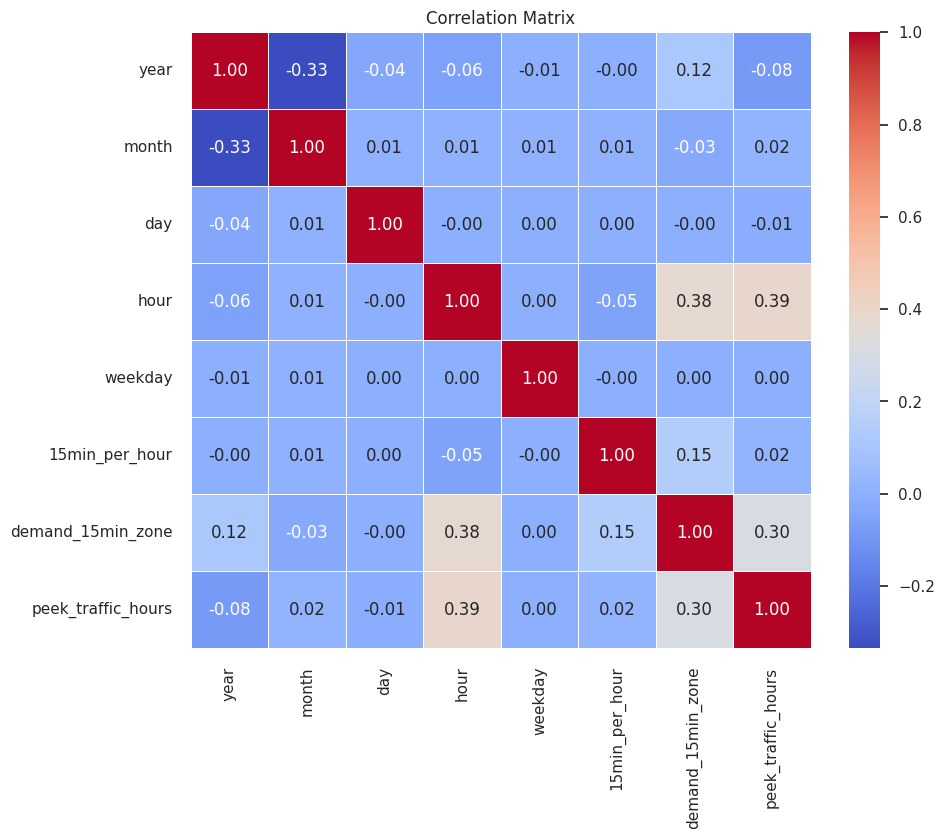

In [ ]:
correlation_matrix = df.corr()
# Plot heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()